In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
bp = 0.1
dp = 0.05
bs = 0.56
ds = 0.06
x = 400000
Kmax = 1000000
h = 14500
fp = 50
fk = 240

bk = 6/185
dk = 1/60

t = np.linspace(0,2000,2000)

C0 = [850,450000]
C1 = [850,450000,200]

In [ ]:
def polar (P,S,t):
    dPdt = 0.9*((S/(x+S))*bp-dp)*P
    return dPdt

In [ ]:
def seal (P,S,t):
    dSdt = 0.9*(bs-ds)*S*(1-(S/Kmax))-(fp*(S/(x+S))*P)
    return dSdt

In [ ]:
def model (Z,t):
    P,S = Z
    dZdt = [polar(P,S,t),seal(P,S,t)]
    return dZdt

In [ ]:
sol = odeint(model, C0, t)

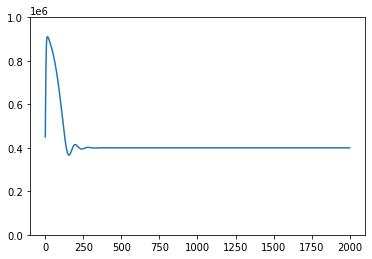

In [ ]:
plt.ylim(0,1000000)
plt.plot(t,sol[:,1])

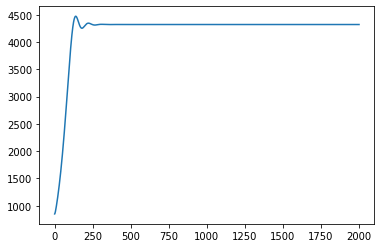

In [ ]:
plt.plot(t,sol[:,0])

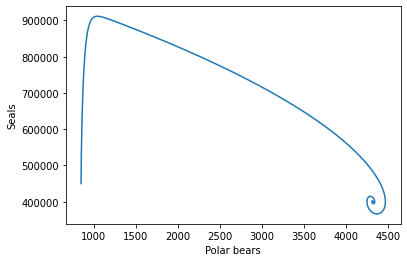

In [ ]:
plt.xlabel('Polar bears')
plt.ylabel('Seals')
plt.plot(sol[:,0],sol[:,1])

In [ ]:
q = np.linspace(0,10,2000)

In [ ]:
P,S = np.meshgrid(q,q)

In [ ]:
U,V = model([P,S],0)

In [ ]:
#plt.quiver(P,S,U,V)

In [ ]:
def model2 (Y,t):
    P,S,K = Y

    polar2 = 1.1*((S/(x+S))*bp-dp)*P 
    seal2 = 1.1*(bs-ds)*S*(1-(S/Kmax))-(fp*(S/(x+S))*P)-(fk*(S/(x+S))*K)
    killer = 1.1*(1.1*(S/(x+S))*bk-dk)*K

    return [polar2,seal2,killer]

In [ ]:
sol2 = odeint(model2,C1,t)

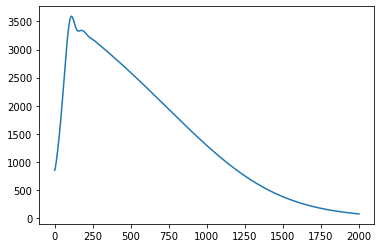

In [ ]:
plt.plot(t,sol2[:,0])

In [ ]:
def Ip (t):
    return -0.011*t+12.3

def Ls (t):
    return (24+0.0166*t)/52

def Lw (t):
    return 1-(24+0.0166*t)/52

Imax = 12.3
Ls0 = 24/52
Lw0 = 1-Ls0

In [ ]:
def model3 (X,t):
    P,S,K = X

    polar3 = ((Ip(t)/Imax)*(Lw(t)/Lw0)*(S/(x+S))*bp-dp)*P 
    seal3 = ((Ip(t)/Imax)*bs-ds)*S*(1-(S/Kmax))-(fp*(S/(x+S))*P)-(fk*(S/(x+S))*K)
    killer2 = ((Ls(t)/Ls0)*1.1*(S/(x+S))*bk-dk)*K

    return [polar3,seal3,killer2]

In [ ]:
sol3 = odeint(model3,C1,t)

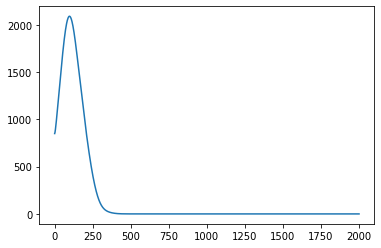

In [ ]:
plt.plot(t,sol3[:,0])

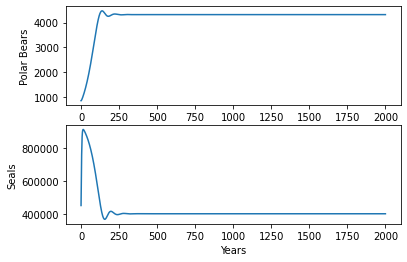

In [ ]:
plt.subplot(211)
plt.ylabel('Polar Bears')
plt.plot(t,sol[:,0])
plt.subplot(212)
plt.xlabel('Years')
plt.ylabel('Seals')
plt.plot(t,sol[:,1])

Text(0, 0.5, 'Killer Whales')

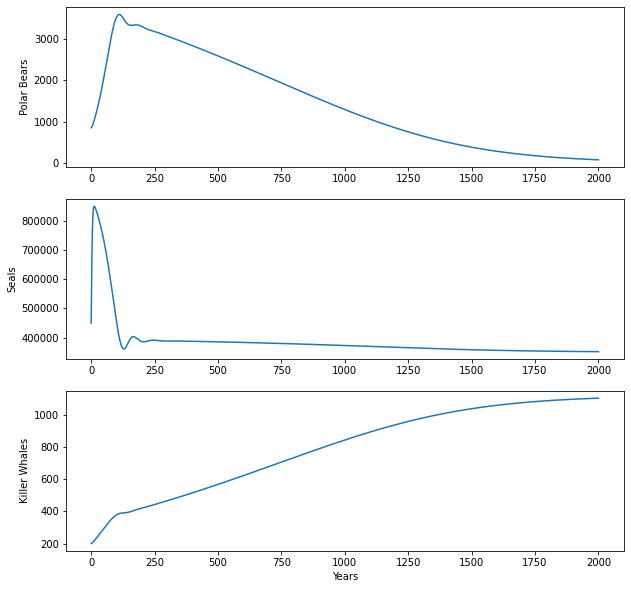

In [ ]:
fig, axes = plt.subplots(3,1, figsize = [10,10])

axes[0].plot(t,sol2[:,0])
axes[0].set_ylabel('Polar Bears')

axes[1].plot(t,sol2[:,1])
axes[1].set_ylabel('Seals')

axes[2].plot(t,sol2[:,2])
axes[2].set_xlabel('Years')
axes[2].set_ylabel('Killer Whales')

353209.3446878627


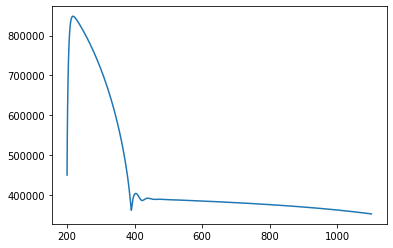

In [ ]:
plt.plot(sol2[:,2],sol2[:,1])
print(sol2[1900,1])

Text(0, 0.5, 'Killer Whales')

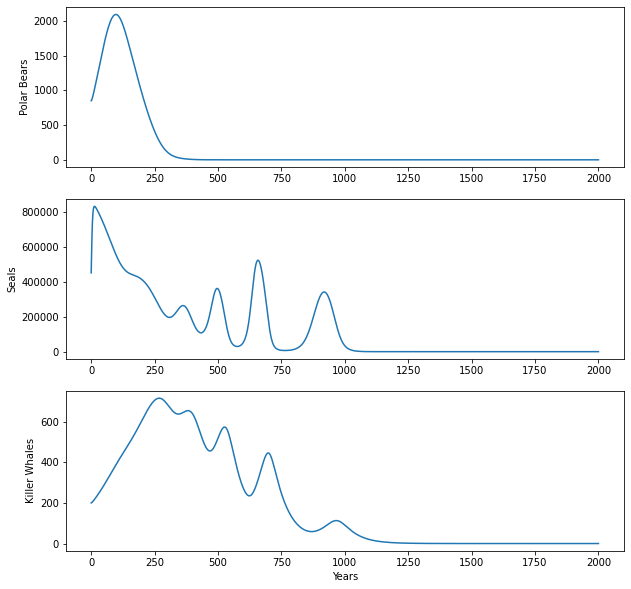

In [ ]:
fig, axes = plt.subplots(3,1, figsize = [10,10])

axes[0].plot(t,sol3[:,0])
axes[0].set_ylabel('Polar Bears')

axes[1].plot(t,sol3[:,1])
axes[1].set_ylabel('Seals')

axes[2].plot(t,sol3[:,2])
axes[2].set_xlabel('Years')
axes[2].set_ylabel('Killer Whales')

In [ ]:
def model4 (W,t):
    P,S = W

    polar4 = ((Ip(t)/Imax)*(Lw(t)/Lw0)*(S/(x+S))*bp-dp)*P 
    seal4 = ((Ip(t)/Imax)*bs-ds)*S*(1-(S/Kmax))-(fp*(S/(x+S))*P)

    return[polar4,seal4]

In [ ]:
sol4 = odeint(model4, C0, t)

Text(0.5, 0, 'Years')

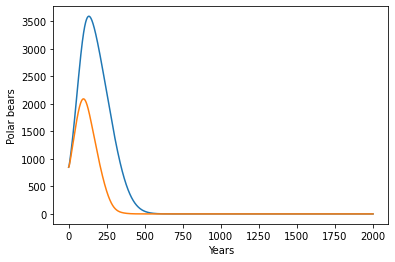

In [ ]:
plt.plot(t,sol4[:,0])
plt.plot(t,sol3[:,0])
plt.ylabel('Polar bears')
plt.xlabel('Years')

In [ ]:
print(sol4[620,0])
print(sol3[420,0])

1.4719613444650306
2.512508472448432


In [ ]:
def model3lower (X,t):
    P,S,K = X

    polar3 = 0.9*((Ip(t)/Imax)*(Lw(t)/Lw0)*(S/(x+S))*bp-dp)*P 
    seal3 = 0.9*((Ip(t)/Imax)*bs-ds)*S*(1-(S/Kmax))-(fp*(S/(x+S))*P)-(fk*(S/(x+S))*K)
    killer2 = 0.9*((Ls(t)/Ls0)*1.1*(S/(x+S))*bk-dk)*K

    return [polar3,seal3,killer2]

In [ ]:
def model3upper (X,t):
    P,S,K = X

    polar3 = 1.1*((Ip(t)/Imax)*(Lw(t)/Lw0)*(S/(x+S))*bp-dp)*P 
    seal3 = 1.1*((Ip(t)/Imax)*bs-ds)*S*(1-(S/Kmax))-(fp*(S/(x+S))*P)-(fk*(S/(x+S))*K)
    killer2 = 1.1*((Ls(t)/Ls0)*1.1*(S/(x+S))*bk-dk)*K

    return [polar3,seal3,killer2]

In [ ]:
sol3L = odeint(model3lower,C1,t)

In [ ]:
sol3U = odeint(model3upper,C1,t)

Text(0.5, 0, 'Years')

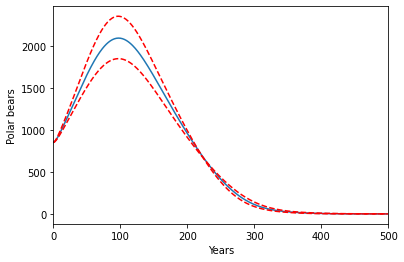

In [ ]:
plt.plot(t,sol3[:,0])
plt.plot(t,sol3L[:,0],'r--')
plt.plot(t,sol3U[:,0],'r--')
plt.xlim(0,500)
plt.ylabel('Polar bears')
plt.xlabel('Years')

In [ ]:
def model4lower (W,t):
    P,S = W

    polar4i = 0.9*((Ip(t)/Imax)*(Lw(t)/Lw0)*(S/(x+S))*bp-dp)*P 
    seal4i = 0.9*((Ip(t)/Imax)*bs-ds)*S*(1-(S/Kmax))-(fp*(S/(x+S))*P)

    return[polar4i,seal4i]

In [ ]:
def model4upper (W,t):
    P,S = W

    polar4j = 1.1*((Ip(t)/Imax)*(Lw(t)/Lw0)*(S/(x+S))*bp-dp)*P 
    seal4j = 1.1*((Ip(t)/Imax)*bs-ds)*S*(1-(S/Kmax))-(fp*(S/(x+S))*P)

    return[polar4j,seal4j]

In [ ]:
sol4L = odeint(model4lower,C0,t)

In [ ]:
sol4U = odeint(model4upper,C0,t)

Text(0.5, 0, 'Years')

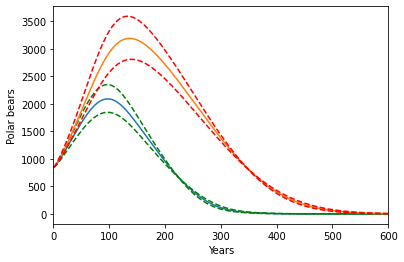

In [ ]:
plt.plot(t,sol3[:,0])
plt.plot(t,sol3L[:,0],'g--')
plt.plot(t,sol3U[:,0],'g--')

plt.plot(t,sol4[:,0])
plt.plot(t,sol4L[:,0],'r--')
plt.plot(t,sol4U[:,0],'r--')

plt.xlim(0,600)
plt.ylabel('Polar bears')
plt.xlabel('Years')